In [1]:
import jax.numpy as jnp
from jax import random, jit, vmap
import matplotlib.pyplot as plt

from quantum_error_correction_code import surface_code, get_deformation_image

In [2]:
p, nu = .01, 500
ERROR_PROBS = jnp.array([
    1 / (2 * (nu + 1)) * p,
    1 / (2 * (nu + 1)) * p,
    nu / (nu + 1) * p,
])

CODE_DISTANCE = 3
# CODE_DEFORMATION = jnp.ones(CODE_DISTANCE**2, dtype=jnp.int32)
CODE_DEFORMATION = jnp.array([2,0,2,3,2,3,2,0,2])

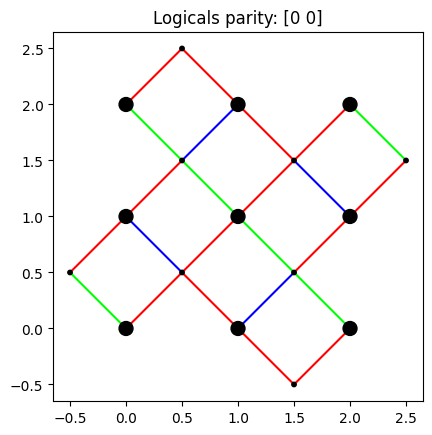

In [37]:
L = CODE_DISTANCE
code = surface_code(L)
parity_info = code.deformation_parity_info(CODE_DEFORMATION)
code.show(parity_info)

In [13]:
key = random.key(42)

X-error: [0 0 0 0 0 0 0 0 0]
Z-error: [0 0 0 1 0 0 0 0 0]
Syndrome: (Array([0, 1, 0, 0, 1, 0, 0, 0], dtype=int32), Array([0, 0], dtype=int32))


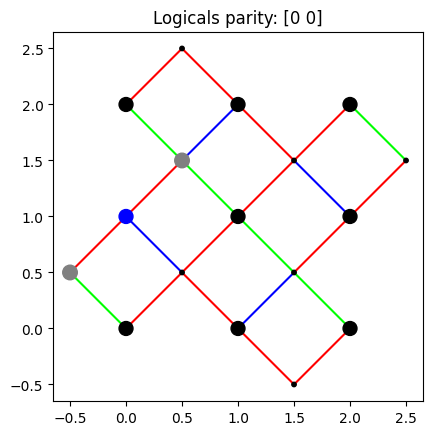

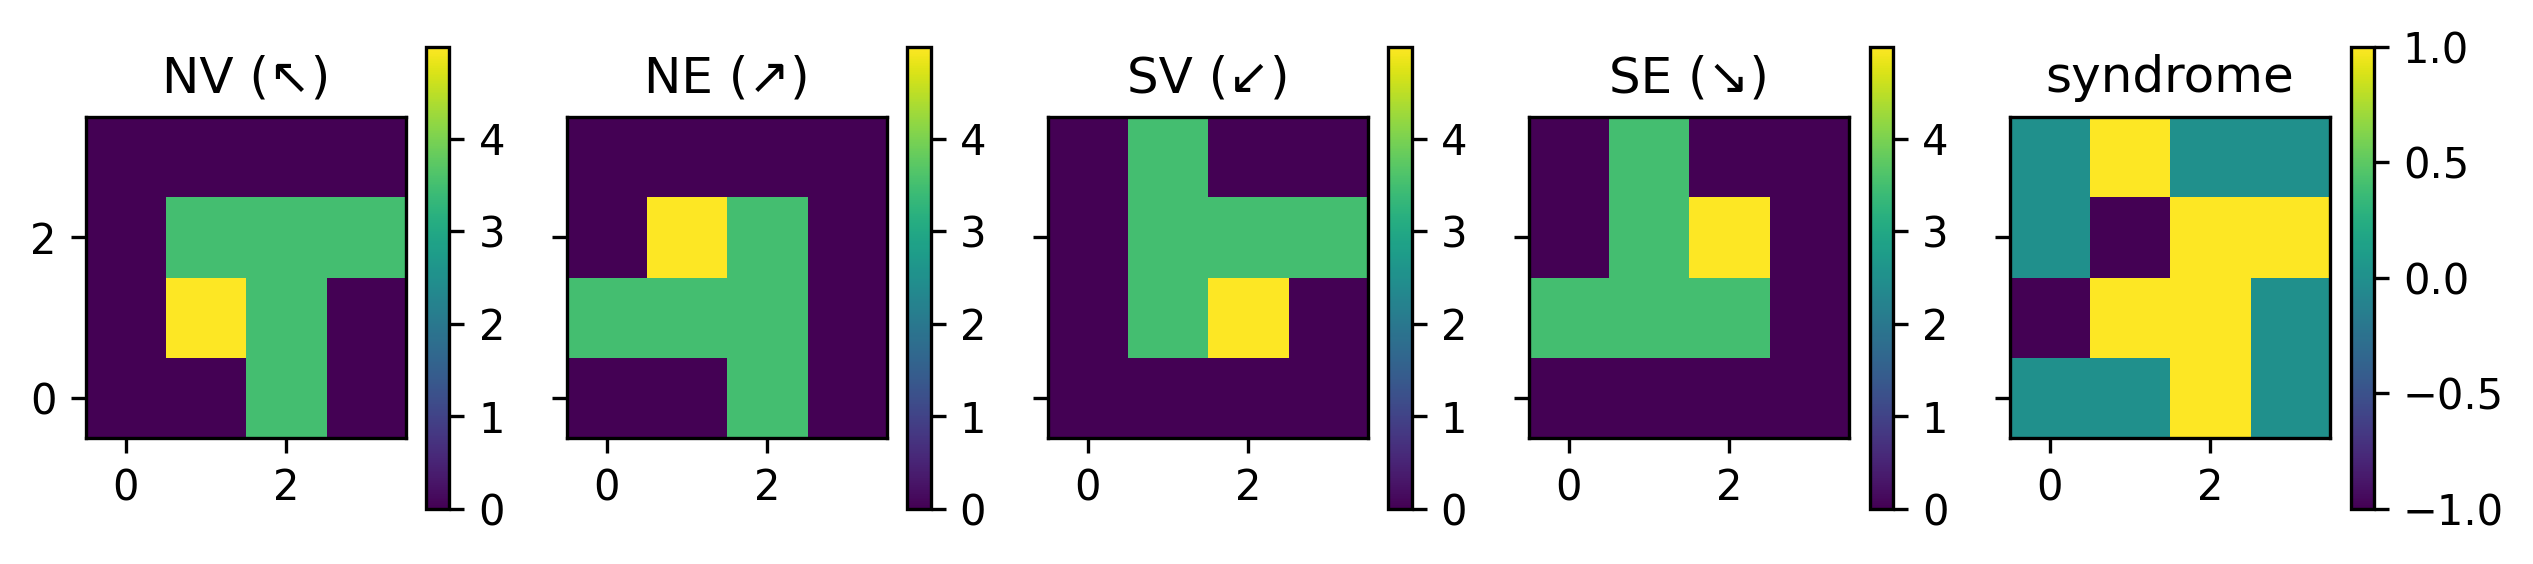

In [46]:
subkey, key = random.split(key)
error = code.error(
    subkey,
    ERROR_PROBS,
    parity_info
)
print("X-error:",error[0].astype(int))
print("Z-error:",error[1].astype(int))
syndrome = code.syndrome(error, parity_info)
print("Syndrome:",syndrome)

code.show(parity_info, error)


img_syndrome, _ = code.syndrome_img(error, parity_info)
img_deformation = get_deformation_image(
    code,
    CODE_DEFORMATION,
    ERROR_PROBS
)

# plt.figure()
# plt.imshow(img_syndrome, origin='lower', vmin=-1.2, vmax=1.2, cmap="seismic_r")
# plt.show()

imgs = jnp.concat((img_deformation, img_syndrome[None,:,:]))

fig, axs = plt.subplots(ncols=5, dpi=300, figsize=(10,2), sharey=True)
for img, ax, title in zip(imgs, axs, ["NV (↖)", "NE (↗)", "SV (↙)", "SE (↘)", "syndrome"]):
    im = ax.imshow(img, origin='lower')
    ax.set_title(title)
    fig.colorbar(im)

In [6]:
BATCH_SIZE = 1000

@jit
def get_data(
    datakey,
    probabilities: jnp.ndarray,
):
    datakey = random.split(datakey, num=BATCH_SIZE+1)
    errors = vmap(
        code.error,
        in_axes=(0, None, None),
        out_axes=0
    )(datakey[:-1], probabilities, parity_info)
    imgs, logicals = vmap(
        code.syndrome_img,
        in_axes=(0, None),
        out_axes=0
    )(errors, parity_info)
    return imgs[:,None,:,:], logicals, datakey[-1]

In [12]:
datakey = random.key(42)

In [ ]:
img_deformation, logicals, datakey = get_data(datakey, ERROR_PROBS)

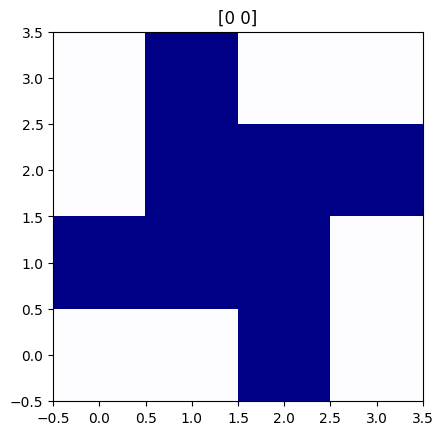

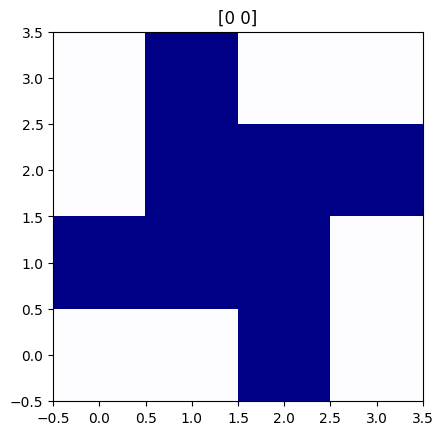

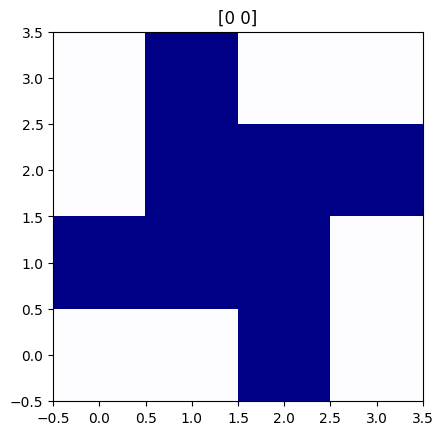

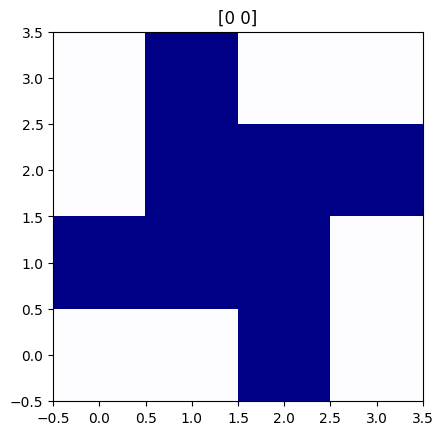

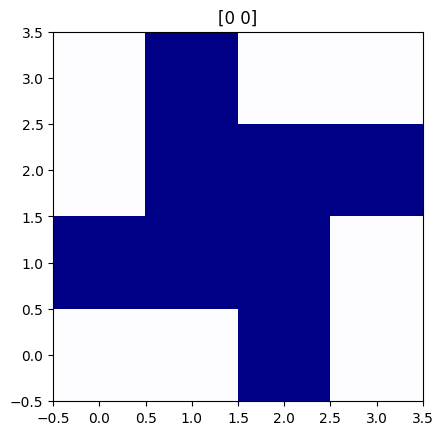

In [ ]:
for img_syndrome, logi in zip(img_deformation[:5], logicals[:5]):
    plt.figure()
    plt.imshow(img_syndrome[0], origin='lower', vmin=-1.2, vmax=1.2, cmap="seismic_r")
    plt.title(logi)
    plt.show()